???? how best to categorize data??? 

categorizer from real output:
    - base on rolling thresholds, as used by true func.
rolling percentile/quantile??  
rolling z-score?  

3 cats = up down same.

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from utils import load_1minute_fx_bars
from categorisation import rolling_qcut
from IPython.display import display

Using Theano backend.
Using gpu device 0: GeForce GTX 580 (CNMeM is disabled, cuDNN not available)


In [2]:
train = load_1minute_fx_bars("USDJPY", 2009)
dev = load_1minute_fx_bars("USDJPY", 2010)

IOError: File /Users/andy/data/DAT_ASCII_USDJPY_M1_2009.csv does not exist

In [4]:
def price(df):
    px = 0.5 * (df['close'] +  0.5 * df['high'] + 0.5* df['low'])    
    return px

In [5]:
display(price(train).head())
display(price(dev).head())

ts
2009-01-01 18:59:00    90.7225
2009-01-01 19:00:00    90.7425
2009-01-01 19:01:00    90.7350
2009-01-01 19:02:00    90.7150
2009-01-01 19:03:00    90.7075
dtype: float64

ts
2010-01-03 17:00:00    92.9750
2010-01-03 17:01:00    92.9600
2010-01-03 17:02:00    92.9850
2010-01-03 17:03:00    92.9925
2010-01-03 17:04:00    92.9925
dtype: float64

In [6]:
px = price(dev)

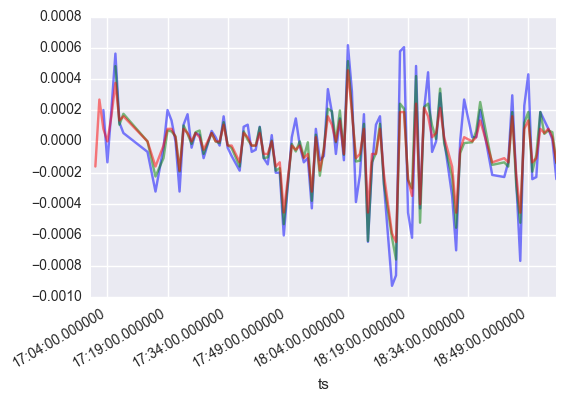

In [16]:
LOOKAHEAD=1
Baseline02SMA(2, LOOKAHEAD).predict(px[:100].pct_change()).plot(style='b-',alpha=0.5)
Baseline02SMA(5, LOOKAHEAD).predict(px[:100].pct_change()).plot(style='g-',alpha=0.5)
px[:100].pct_change().plot(style='r-',alpha=0.5)
#model.fit(price(train), metric_fn=mean_squared_error,n_iterations=2)

In [ ]:

prediction = model.predict(px)
pred_return = prediction.pct_change()
fut_return = (px.shift(-LOOKAHEAD)/px)-1

In [ ]:
y_true = np.sign(fut_return.fillna(0)  ).astype(int)
y_pred = np.sign(pred_return.fillna(0) ).astype(int)
print classification_report(y_true, y_pred)
sns.heatmap(confusion_matrix(y_true, y_pred))

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
plt.plot(fut_return[:60], '.-', label='px')
plt.plot(pred_return[:60], '.-', label='pred')
plt.legend()

In [ ]:
CATEGORIES = 5
y_true = pd.qcut(fut_return.fillna(0),CATEGORIES, labels=range(CATEGORIES)).astype(int)
y_pred = pd.qcut(pred_return.fillna(0), CATEGORIES, labels=range(CATEGORIES)).astype(int)
print classification_report(y_true, y_pred)
print "f1*categories", f1_score(y_true, y_pred, average='weighted') * CATEGORIES

cm = confusion_matrix(y_true, y_pred)
print cm
sns.heatmap(cm)

In [ ]:
f1s = []
cs = []
for c in range(2,5):
    y_true = pd.qcut(fut_return.fillna(0),c, labels=range(c)).astype(int)
    y_pred = pd.qcut(pred_return.fillna(0), c, labels=range(c)).astype(int)
    f1 = f1_score(y_true, y_pred, average='weighted') * c
    print c, f1
    f1s.append(f1)
    cs.append(c)
plt.plot(cs, f1s)

Binary Classification

In [ ]:
print "R2 ", r2_score(fut_return.fillna(0), pred_return.fillna(0))
print "MAE", mean_absolute_error(fut_return.fillna(0), pred_return.fillna(0))/fut_return.std()
print "MSE", mean_squared_error(fut_return.fillna(0), pred_return.fillna(0))/fut_return.var()

In [ ]:
FIGSIZE=(20,12)
L = 4000
CATEGORIES = 5
WINDOW = 1000
fig, axes = plt.subplots(1,1, figsize=FIGSIZE)

px[:L].pct_change().plot(style='r.', alpha=0.2, ax=axes)
qc = rolling_qcut(px[:L].pct_change(), CATEGORIES, WINDOW)
qc.plot(alpha=1.0, ax=axes)
